Import the ODP Python SDK

In [1]:
from odp_sdk import ODPClient


Connect to ODP 

In [5]:
import getpass
client = ODPClient(api_key=getpass.getpass(prompt='Insert your personal ODP API key:'), #OWNhYmQyMWMtNGIyMS00ZDdhLTg1NWUtYTdmMzUxMmJlOTQ1
                       project="odp", client_name="odp")

Insert your personal ODP API key:········


Get dataframe of casts within search criterias

In [6]:
df=client.casts(longitude=[-10,35],
                latitude=[50,80],
                timespan=['2018-01-01','2018-12-31'],
                n_threads=35) 

Locating available casts..
-> 7361 casts found
-> 1154126 data rows downloaded in 53.29s


Explore data statistics

In [7]:
# General statistics
df[['z','Temperature','Oxygen','Salinity']].describe()

,z,Temperature,Oxygen,Salinity
count,1.154126e+06,1.153973e+06,351119.000000,1.153455e+06
mean,3.973432e+02,5.800114e+00,275.122885,3.135395e+01
std,5.947889e+02,5.095348e+00,68.850410,7.754903e+00
min,0.000000e+00,-9.000000e+00,0.000000,1.270000e-01
25%,2.869464e+01,1.074000e+00,254.450836,3.399500e+01
50%,1.306177e+02,5.850000e+00,279.285919,3.491250e+01
75%,4.785878e+02,8.240000e+00,298.892578,3.503050e+01
max,3.755397e+03,2.549400e+01,565.107422,3.551800e+01


In [8]:
# Correlations
df[['z','Temperature','Oxygen','Salinity']].corr()

,z,Temperature,Oxygen,Salinity
z,1.000000,-0.621816,0.056617,0.291514
Temperature,-0.621816,1.000000,-0.437119,-0.295298
Oxygen,0.056617,-0.437119,1.000000,-0.190750
Salinity,0.291514,-0.295298,-0.190750,1.000000


Plot casts

In [9]:
# Import some utility functions
import CastFunctions as c_func
import numpy as np
import cmocean

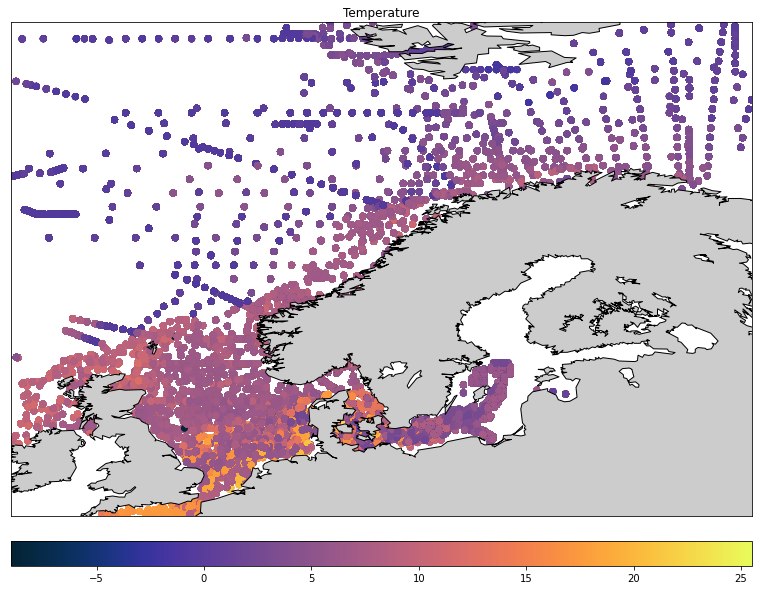

In [30]:
# Plot raw casts
c_func.plot_casts('Temperature',df,cmap=cmocean.cm.thermal)


Create temperature grid at a specific date

Text(0.5, 1.0, 'Gridded map of surface temperature, 2018-07-01')

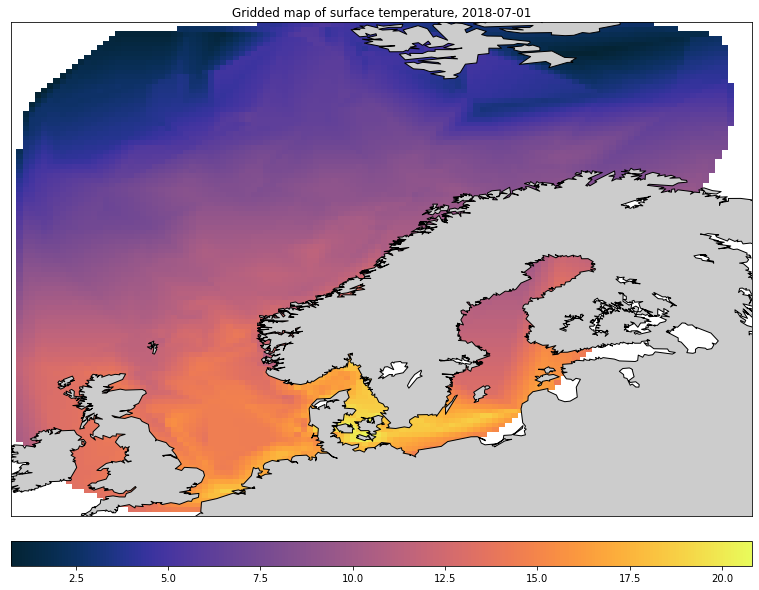

In [34]:

# Create grid
int_lon, int_lat,t= np.meshgrid(np.linspace(-10,35,40*3+1),np.linspace(50,80,35*3+1),0)

# Interpolate points to given grid and date
g=c_func.interpolate_casts(df[df.z<5],'Temperature',int_lon,int_lat,'2018-07-01',days_buffer=180)

# Plot grid
c_func.plot_grid(int_lon, int_lat, g,cmap=cmocean.cm.thermal) 
plt.title('Gridded map of surface temperature, 2018-07-01')

In [27]:
import matplotlib.pyplot as plt
import numpy as np

coord = {
'lat':[56,73,56],
'lon':[3,20,18],
'name':['North Sea','Barents Sea','Baltic Sea']}

temp=[]
for mnth in range(1,13):
    g=c_func.interpolate_casts(df[df.z<5],'Temperature',coord['lon'],coord['lat'], '2018-%02d-01'%mnth,days_buffer=90)    
    temp.append(g)

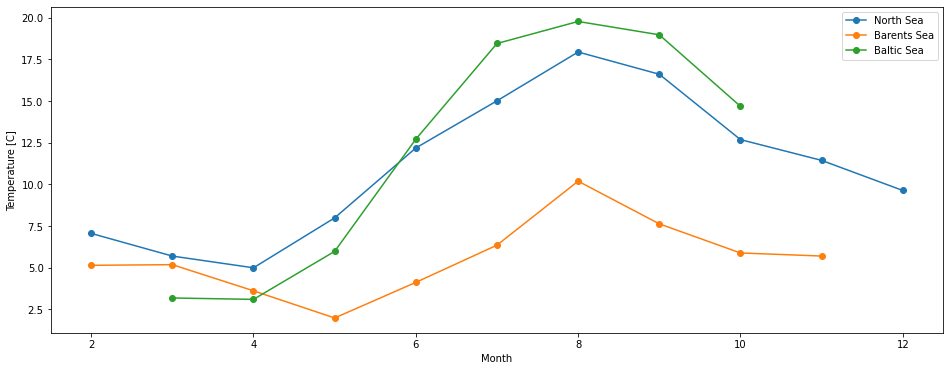

In [33]:
t=np.array(temp[1:])
plt.figure(figsize=(16,6))
plt.plot(np.linspace(2,12,11),t,'-o')
plt.xlabel('Month')
plt.ylabel('Temperature [C]')
plt.legend(coord['name'],loc=0)

In [35]:
df

,date,lat,lon,z,z_WODflag,z_origflag,Oxygen,Oxygen_WODflag,Oxygen_origflag,Temperature,...,Pressure,Pressure_WODflag,Pressure_origflag,Nitrate,Nitrate_WODflag,Nitrate_origflag,pH,pH_WODflag,pH_origflag,datetime
0,20181127,54.65383,-9.961833,3.964024,0,NaN,NaN,NaN,NaN,11.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27
1,20181127,54.65383,-9.961833,4.955018,0,NaN,NaN,NaN,NaN,11.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27
2,20181127,54.65383,-9.961833,5.946007,0,NaN,NaN,NaN,NaN,11.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27
3,20181127,54.65383,-9.961833,6.936992,0,NaN,NaN,NaN,NaN,11.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27
4,20181127,54.65383,-9.961833,7.927971,0,NaN,NaN,NaN,NaN,11.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,20180515,59.32050,20.000834,43.582890,0,NaN,NaN,NaN,NaN,2.549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-15
44,20180515,59.32050,20.000834,44.573292,0,NaN,NaN,NaN,NaN,2.567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-15
45,20180515,59.32050,20.000834,45.563705,0,NaN,NaN,NaN,NaN,2.575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-15
46,20180515,59.32050,20.000834,46.554108,0,NaN,NaN,NaN,NaN,2.584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-15


In [36]:
df.iloc[0:100].plot('Temperature')

ValueError: view limit minimum -1009066.80992465 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
import warnings
warnings.filterwarnings("ignore")